## Setup

In [1]:
from imports import *
from constants import *
from functions import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
import re

In [2]:
warnings.filterwarnings("ignore")

In [3]:
n_features = np.arange(10000,100001,10000)

### Tdif vs Countvectorizer

In [4]:
train_df = readCSV("train_split.csv")
x_train = train_df["x_train"]
y_train = train_df["y_train"]
test_df = readCSV("test_split.csv")
x_test = test_df["x_test"]
y_test = test_df["y_test"]
validation_df = readCSV("validation_split.csv")
x_validation = validation_df["x_validation"]
y_validation = validation_df["y_validation"]

In [5]:
def getName(obj):
    txt = str(type(obj))
    match = re.search(r"'([^']*)'", txt)  # Match single-quoted string
    return str.lower(match.group(1).split(".")[-1])  # Extract the matched text

def predict(pipeline, x_train, y_train, x_test, prefix, features):
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    tpred = time() - t0
    name = "results/" + prefix + "-" + "-".join(list(map(getName,pipeline.named_steps.values()))) + "-" + str(features) + ".csv"
    pred_df = pd.DataFrame()
    pred_df['y_pred'] = y_pred
    saveDF(pred_df,name)
    return y_pred, tpred

cvec = CountVectorizer()
lr = LogisticRegression()

checker_pipeline = Pipeline([
            ('vectorizer', cvec),
            ('classifier', lr)
])

def accuracy_summary(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

def accuracy_summary_with_train(pipeline, x_train, y_train, x_test, y_test, prefix, features):
    y_pred, train_test_time = predict(pipeline, x_train, y_train, x_test,prefix,features)
    accuracy = accuracy_summary(y_test,y_pred)
    auxAcc = len(x_test[y_test == 0]) / (len(x_test)*1.) 
    null_accuracy = max(1-auxAcc, auxAcc)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

def accuracy_summary_from_csv(path,y_test):
    df = readCSV(path)
    return accuracy_summary(y_test,df['y_pred'])

def nfeatures_plot_from_csv(baseFileName, y_test):
    path = "results/" + baseFileName + "-"
    accuracys = []
    for n in n_features:
        npath = path + str(n) + ".csv"
        accuracy = accuracy_summary_from_csv(npath,y_test)
        accuracys.append(accuracy)
    result = pd.DataFrame()
    result['nfeatures'] = n_features
    result['validation_accuracy'] = accuracys
    return result
 
cvec = CountVectorizer()
lr = LogisticRegression()

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr, prefix=""):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary_with_train(checker_pipeline, x_train, y_train, x_validation, y_validation, prefix, n)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [6]:
tvec = TfidfVectorizer()

In [8]:
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec,prefix="ugt")

LogisticRegression()


Validation result for 10000 features
15960
15960
15961
null accuracy: 50.55%
accuracy score: 79.75%
model is 29.20% more accurate than null accuracy
train and test time: 31.54s
--------------------------------------------------------------------------------
Validation result for 20000 features
15960
15960
15961
null accuracy: 50.55%
accuracy score: 80.06%
model is 29.51% more accurate than null accuracy
train and test time: 32.58s
--------------------------------------------------------------------------------
Validation result for 30000 features
15960
15960
15961
null accuracy: 50.55%
accuracy score: 80.25%
model is 29.71% more accurate than null accuracy
train and test time: 36.24s
--------------------------------------------------------------------------------
Validation result for 40000 features
15960
15960
15961
null accuracy: 50.55%
accuracy score: 79.98%
model is 29.44% more accurate than null accuracy
train and test time: 35.05s
--------------------------

In [16]:
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2),prefix="bgt")

LogisticRegression()


Validation result for 10000 features
null accuracy: 50.55%
accuracy score: 80.73%
model is 30.19% more accurate than null accuracy
train and test time: 60.76s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.55%
accuracy score: 81.47%
model is 30.92% more accurate than null accuracy
train and test time: 66.02s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.55%
accuracy score: 81.79%
model is 31.25% more accurate than null accuracy
train and test time: 67.41s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.55%
accuracy score: 82.03%
model is 31.48% more accurate than null accuracy
train and test time: 72.30s
--------------------------------------------------------------------------------
Validation result

In [19]:
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3),prefix="tgt")

LogisticRegression()


Validation result for 10000 features
null accuracy: 50.55%
accuracy score: 80.72%
model is 30.18% more accurate than null accuracy
train and test time: 160.08s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.55%
accuracy score: 81.32%
model is 30.78% more accurate than null accuracy
train and test time: 145.16s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.55%
accuracy score: 82.07%
model is 31.53% more accurate than null accuracy
train and test time: 154.98s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.55%
accuracy score: 82.09%
model is 31.54% more accurate than null accuracy
train and test time: 147.94s
--------------------------------------------------------------------------------
Validation re

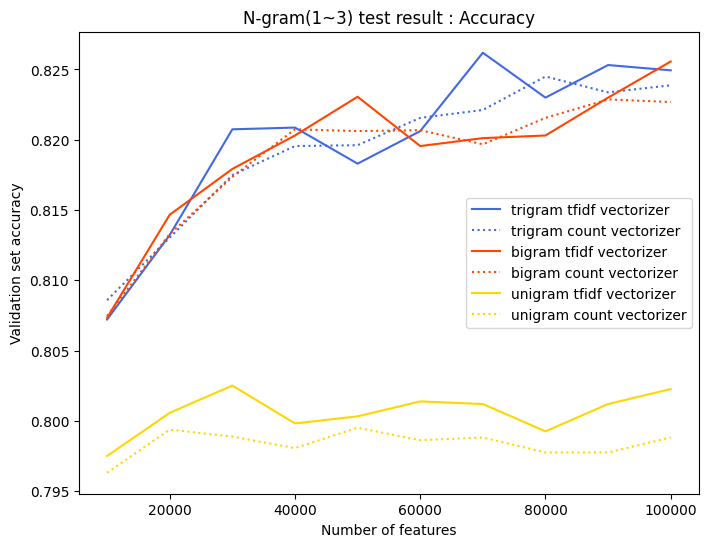

In [20]:
nfeatures_plot_tgt = nfeatures_plot_from_csv("tgt-tfidfvectorizer-logisticregression",y_validation)
nfeatures_plot_bgt = nfeatures_plot_from_csv("bgt-tfidfvectorizer-logisticregression",y_validation)
nfeatures_plot_ugt = nfeatures_plot_from_csv("ugt-tfidfvectorizer-logisticregression",y_validation)
nfeatures_plot_tg = nfeatures_plot_from_csv("tg-countvectorizer-logisticregression",y_validation)
nfeatures_plot_bg = nfeatures_plot_from_csv("bg-countvectorizer-logisticregression",y_validation)
nfeatures_plot_ug = nfeatures_plot_from_csv("ug-countvectorizer-logisticregression",y_validation)
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

We can see that the best results are obtained with the trigram and using tfidf as vectorizer

### Algorithms Comparison

In [7]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_accuracy,tt_time = accuracy_summary_with_train(checker_pipeline, x_train, y_train, x_validation, y_validation,"comp",10000)
        result.append((n,clf_accuracy,tt_time))
    return result

In [8]:
trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))

Validation result for Logistic Regression
LogisticRegression()
null accuracy: 50.55%
accuracy score: 82.49%
model is 31.95% more accurate than null accuracy
train and test time: 141.31s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC()
null accuracy: 50.55%
accuracy score: 82.30%
model is 31.75% more accurate than null accuracy
train and test time: 153.48s
--------------------------------------------------------------------------------
Validation result for LinearSVC with L1-based feature selection
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(dual=False,
                                                     penalty='l1'))),
                ('classification', LinearSVC())])
null accuracy: 50.55%
accuracy score: 82.36%
model is 31.82% more accurate than null accuracy
train and test time: 331.86s
--------------------------------------------------------------------------

In [12]:
pd.DataFrame(trigram_result,columns=['model','validation set accuracy', 'train and test time']).sort_values(by="validation set accuracy", ascending=False)

,model,validation set accuracy,train and test time
0,Logistic Regression,0.824937,141.311085
2,LinearSVC with L1-based feature selection,0.823622,331.857468
1,Linear SVC,0.822995,153.479798
5,Ridge Classifier,0.822243,147.387572
3,Multinomial NB,0.801880,114.285748
8,Passive-Aggresive,0.799185,116.721328
4,Bernoulli NB,0.790226,116.134751
7,Perceptron,0.771241,114.968320
9,Nearest Centroid,0.731830,112.803681
6,AdaBoost,0.705388,776.572044


Among all, the best is Logistic Regression

#### Voting classifier

In [9]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = MultinomialNB()
clf4 = RidgeClassifier()
clf5 = PassiveAggressiveClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Logistic Regression', 'Linear SVC', 'Multinomial NB', 'Ridge Classifier', 'Passive Aggresive Classifier', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=100000,ngram_range=(1, 3))),
            ('classifier', clf)
        ])
    print("Validation result for {}".format(label))
    print(clf)
    clf_accuracy,tt_time = accuracy_summary_with_train(checker_pipeline, x_train, y_train, x_validation, y_validation,"vot",1000000)

Validation result for Logistic Regression
LogisticRegression()
null accuracy: 50.55%
accuracy score: 82.49%
model is 31.95% more accurate than null accuracy
train and test time: 200.26s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC()
null accuracy: 50.55%
accuracy score: 82.30%
model is 31.75% more accurate than null accuracy
train and test time: 204.05s
--------------------------------------------------------------------------------
Validation result for Multinomial NB
MultinomialNB()
null accuracy: 50.55%
accuracy score: 80.19%
model is 29.64% more accurate than null accuracy
train and test time: 157.47s
--------------------------------------------------------------------------------
Validation result for Ridge Classifier
RidgeClassifier()
null accuracy: 50.55%
accuracy score: 82.22%
model is 31.68% more accurate than null accuracy
train and test time: 203.35s
-----------------------------------------------

It's for a little difference but LogisticRegression is still better

### Lexical Analysis